In [1]:
%matplotlib inline

# Some Context

The US Census is complex....so it's good, even essential, to have a framing question to guide your explorations so that you don't get distracted or lost.

I got into thinking of the census in 2002 when I saw a woman I knew in the following SF Chronicle article: 

[Claremont-Elmwood / Homogeneity in Berkeley? Well, yeah - SFGate](http://www.sfgate.com/bayarea/article/Claremont-Elmwood-Homogeneity-in-Berkeley-3306778.php)

I thought at that point it should be easy for regular people to do census calculations....

In the summer of 2013, I wrote the following note to Greg Wilson about diversity calculations:

[notes for Greg Wilson about an example Data Science Workflow](https://www.evernote.com/shard/s1/sh/b3f79cbc-c0c3-48a3-87b6-91da1b939783/1857ddee32d7baa04c55e629da05e0a7)

There's a whole cottage industry in musing on "diversity" in the USA:

* [The Most Diverse Cities In The US - Business Insider](http://www.businessinsider.com/the-most-diverse-cities-in-the-us-2013-7) -- using 4 categories:  Vallejo.

* [Most And Least Diverse Cities: Brown University Study Evaluates Diversity In The U.S.](http://www.huffingtonpost.com/2012/09/07/most-least-diverse-cities-brown-university-study_n_1865715.html)

* [The Top 10 Most Diverse Cities in America](http://www.cnbc.com/id/43066296) -- LA?

and let's not forget the [Racial Dot Map](http://bit.ly/rdotmap) and [some background](http://bit.ly/rdotmapintro).


In [2]:
#  import useful classes of pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index

http://www.census.gov/developers/

Dependency:  use a special version of the `census module`:

In BCE, go to the shell and type

```
. activate py34
```

to use the Python 34 env.  Then:

```
pip install -e git+https://github.com/rdhyee/census.git#egg=census
```

Things we'd like to be able to do:

* calculate the population of California.
* then calculate the population of every geographic entity going down to census block if possible.
* for a given geographic unit, can we get the racial/ethnic breakdown?


# Figuring out the Census Data is a Big Jigsaw Puzzle

Some starting points:
    
   * [Developers - U.S. Census Bureau](http://www.census.gov/developers/)
   * [census/README.rst at master · sunlightlabs/census](https://github.com/sunlightlabs/census/blob/master/README.rst)
    

We focus first on the API -- and I hope we can come back to processing the bulk data from [Census FTP site](http://www2.census.gov/)

# Prerequisites: Getting and activating key

* fill out form at http://www.census.gov/developers/tos/key_request.html 

"Your request for a new API key has been successfully submitted. Please check your email. In a few minutes you should receive a message with instructions on how to activate your new key."

* click on link you'll get http://api.census.gov/data/KeySignup?validate={key}

Then create a settings.py in the same directory as this notebook (or somewhere else in your Python path) to hold `settings.CENSUS_KEY`

In [3]:
import settings

In [4]:
# This cell should run successfully if you have a string set up to represent your census key

try:
    import settings
    assert type(settings.CENSUS_KEY) == str or type(settings.CENSUS_KEY) == unicode
except Exception as e:
    print ("error in importing settings to get at settings.CENSUS_KEY", e)

# states module

In [5]:
# let's figure out a bit about the us module, in particular, us.states
# https://github.com/unitedstates/python-us

from us import states

for (i, state) in enumerate(states.STATES):
    print (i, state.name, state.fips)

0 Alabama 01
1 Alaska 02
2 Arizona 04
3 Arkansas 05
4 California 06
5 Colorado 08
6 Connecticut 09
7 Delaware 10
8 District of Columbia 11
9 Florida 12
10 Georgia 13
11 Hawaii 15
12 Idaho 16
13 Illinois 17
14 Indiana 18
15 Iowa 19
16 Kansas 20
17 Kentucky 21
18 Louisiana 22
19 Maine 23
20 Maryland 24
21 Massachusetts 25
22 Michigan 26
23 Minnesota 27
24 Mississippi 28
25 Missouri 29
26 Montana 30
27 Nebraska 31
28 Nevada 32
29 New Hampshire 33
30 New Jersey 34
31 New Mexico 35
32 New York 36
33 North Carolina 37
34 North Dakota 38
35 Ohio 39
36 Oklahoma 40
37 Oregon 41
38 Pennsylvania 42
39 Rhode Island 44
40 South Carolina 45
41 South Dakota 46
42 Tennessee 47
43 Texas 48
44 Utah 49
45 Vermont 50
46 Virginia 51
47 Washington 53
48 West Virginia 54
49 Wisconsin 55
50 Wyoming 56


Questions to ponder: How many states are in the list? Is DC included the states list?  How to access the territories?

# Formulating URL requests by hand

It's immensely useful to be able to access the census API directly but creating a URL with the proper parameters -- as well as using the `census` package.

In [6]:
import requests

In [7]:
# get the total population of all states
url = "http://api.census.gov/data/2010/sf1?key={key}&get=P0010001,NAME&for=state:*".format(key=settings.CENSUS_KEY)

In [8]:
# note the structure of the response
r = requests.get(url)
print(r.content.decode('utf-8'))

[["P0010001","NAME","state"],
["4779736","Alabama","01"],
["710231","Alaska","02"],
["6392017","Arizona","04"],
["2915918","Arkansas","05"],
["37253956","California","06"],
["5029196","Colorado","08"],
["3574097","Connecticut","09"],
["897934","Delaware","10"],
["601723","District of Columbia","11"],
["18801310","Florida","12"],
["9687653","Georgia","13"],
["1360301","Hawaii","15"],
["1567582","Idaho","16"],
["12830632","Illinois","17"],
["6483802","Indiana","18"],
["3046355","Iowa","19"],
["2853118","Kansas","20"],
["4339367","Kentucky","21"],
["4533372","Louisiana","22"],
["1328361","Maine","23"],
["5773552","Maryland","24"],
["6547629","Massachusetts","25"],
["9883640","Michigan","26"],
["5303925","Minnesota","27"],
["2967297","Mississippi","28"],
["5988927","Missouri","29"],
["989415","Montana","30"],
["1826341","Nebraska","31"],
["2700551","Nevada","32"],
["1316470","New Hampshire","33"],
["8791894","New Jersey","34"],
["2059179","New Mexico","35"],
["19378102","New York","36"],
[

# Total Population

In [9]:
# FILL IN
# drop the header record
from itertools import islice
# total population including PR is 312471327



In [10]:
# FILL IN
# exclude PR:  308745538




In [11]:
# let's now create a DataFrame from r.json()

df = DataFrame(r.json()[1:], columns=r.json()[0])
df['P0010001'] = df['P0010001'].astype(int)

In [12]:
# FILL IN
# calculate the total population using df

df.P0010001.sum()


312471327

In [13]:
# FILL IN -- now calculate the total population excluding Puerto Rico





# Focusing on sf1 +2010 census

How to map out the geographical hierachy and pull out total population figures?

 1. Nation
 1. Regions
 1. Divisions
 1. State
 1. County
 1. Census Tract
 1. Block Group
 1. Census Block
 
Questions
 
* What identifiers are used for these various geographic entities?  
* Can we get an enumeration of each of these entities?
* How to figure out which census tract, block group, census block one is in?
 


## Total Population of California

[2010 Census Summary File 1](http://www.census.gov/prod/cen2010/doc/sf1.pdf)

P0010001 is found in [2010 SF1 API Variables \[XML\]](http://api.census.gov/data/2010/sf1/variables.xml) = "total population"



In [14]:
from settings import CENSUS_KEY
import census

c=census.Census(settings.CENSUS_KEY) 
c.sf1.get(('NAME', 'P0010001'), {'for': 'state:%s' % states.CA.fips})

[{'NAME': 'California', 'P0010001': '37253956', 'state': '06'}]

In [15]:
"population of California: {0}".format(
        int(c.sf1.get(('NAME', 'P0010001'), {'for': 'state:%s' % states.CA.fips})[0]['P0010001']))

'population of California: 37253956'

Let's try to get at the counties of California and their populations

In [16]:
ca_counties = c.sf1.get(('NAME', 'P0010001'), geo={'for': 'county:*', 'in': 'state:%s' % states.CA.fips})

In [17]:
# create a DataFrame, convert the 'P0010001' column
# show by descending population
df = DataFrame(ca_counties)
df['P0010001'] = df['P0010001'].astype('int')
df.sort_index(by='P0010001', ascending=False)

,NAME,P0010001,county,state
18,Los Angeles County,9818605,037,06
36,San Diego County,3095313,073,06
29,Orange County,3010232,059,06
32,Riverside County,2189641,065,06
35,San Bernardino County,2035210,071,06
42,Santa Clara County,1781642,085,06
0,Alameda County,1510271,001,06
33,Sacramento County,1418788,067,06
6,Contra Costa County,1049025,013,06
9,Fresno County,930450,019,06


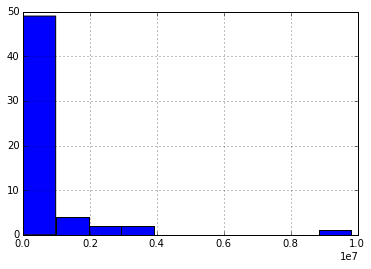

In [18]:
#http://stackoverflow.com/a/13130357/7782
count,division = np.histogram(df['P0010001'])
df['P0010001'].hist(bins=division)